In [1]:
import numpy as np
import sympy

import time
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display
import itertools

from z3 import *

In [2]:
url='https://www.janestreet.com/puzzles/number-cross-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[8]+"\n\n"+str("\n\n".join(y[10:12]))))

### August 2014 : Puzzle

Place the digits 1 thru 9 (no zeroes) in the crossword grid below so that all of
the clues are satisfied. No digit is repeated in any one grid entry (e.g.
1-across is a grid entry), and no grid entry is used more than once within the
puzzle.

For your answer, submit the sum of the 8 5-digit grid entries in the completed
grid (e.g. 4-down, 18-across, etc.)

<img src="https://www.janestreet.com/puzzles/number_crossword_with_clues.png" width="650">

In [3]:
grid = np.array([[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
                 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
                ],dtype=int)

In [4]:
# some utility functions
def mult(x):
    n=len(x)
    return Sum([x[i] *10**((n-1)-i)  for i in range(n)]) 

def sum_dig(x):
    return Sum([i for i in x])

def make_across(x,y,n):
    return [X[x][y+i] for i in range(n)]

def make_down(x,y,n):
    return [X[x+i][y] for i in range(n)]

Solved in 139.6733 seconds

Solution is : 407,358

Solved Grid
~~~~~~~~~~~


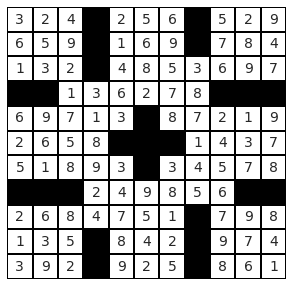

In [5]:
start = time.time()
######################################################
# Setup # 11x11 matrix of integer variables and solver #
######################################################
X = [[Int("x_%s_%s" % (i+1, j+1)) for j in range(11)] for i in range(11)]
s = Solver()

###################
# The constraints #
###################

# each non-black cell contains a value in {1, ..., 9} black cells = 0
s += [And(1 <= X[i][j], X[i][j] <= 9) for i in range(11) for j in range(11) if grid[i,j] != 1]
s+= [X[i][j] == 0 for i in range(11) for j in range(11) if grid[i,j] == 1]

####################
# Set up the clues #
###################=

across = {}
across[1]  = make_across(0,0,3)
across[4]  = make_across(0,4,3)
across[7]  = make_across(0,8,3)
across[10] = make_across(1,0,3)
across[11] = make_across(1,4,3)
across[12] = make_across(1,8,3)
across[13] = make_across(2,0,3)
across[14] = make_across(2,4,7)
across[16] = make_across(3,2,6)
across[18] = make_across(4,0,5)
across[20] = make_across(4,6,5)
across[24] = make_across(5,0,4)
across[25] = make_across(5,7,4)
across[26] = make_across(6,0,5)
across[28] = make_across(6,6,5)
across[29] = make_across(7,3,6)
across[31] = make_across(8,0,7)
across[34] = make_across(8,8,3)
across[37] = make_across(9,0,3)
across[38] = make_across(9,4,3)
across[39] = make_across(9,8,3)
across[40] = make_across(10,0,3)
across[41] = make_across(10,4,3)
across[42] = make_across(10,8,3)

down = {}
down[1] = make_down(0,0,3)
down[2] = make_down(0,1,3)
down[3] = make_down(0,2,7)
down[4] = make_down(0,4,5)
down[5] = make_down(0,5,4)
down[6] = make_down(0,6,5)
down[7] = make_down(0,8,3)
down[8] = make_down(0,9,3)
down[9] = make_down(0,10,3)
down[15] = make_down(2,7,6)
down[17] = make_down(3,3,6)
down[18] = make_down(4,0,3)
down[19] = make_down(4,1,3)
down[21] = make_down(4,8,7)
down[22] = make_down(4,9,3)
down[23] = make_down(4,10,3)
down[27] = make_down(6,4,5)
down[28] = make_down(6,6,5)
down[30] = make_down(7,5,4)
down[31] = make_down(8,0,3)
down[32] = make_down(8,1,3)
down[33] = make_down(8,2,3)
down[35] = make_down(8,9,3)
down[36] = make_down(8,10,3)

clues =[v for k,v in across.items()]+[v for k,v in down.items()]

#distinct clues and letters in clues
s += Distinct([mult(i) for i in clues])
s += [Distinct([x for x in i]) for i in clues]

#############
# The clues #
#############

#squares
square_numbers = [i**2 for i in range(10,32)]
sq_across = [1,4,7,11,12]
s += [Or([mult(across[i]) == x for x in square_numbers]) for i in sq_across]
sq_down = [1,7,8,18,19,36]
s += [Or([mult(down[i]) == x for x in square_numbers]) for i in sq_down]

#primes
prime_numbers = [*sympy.primerange(100,1000)]
pr_across = [39]
s += [Or([mult(across[i]) == x*2 for x in prime_numbers]) for i in pr_across]
pr_down = [9,22]
s += [Or([mult(down[i]) == x for x in prime_numbers]) for i in pr_down]

# simple across
s += mult(across[10]) < mult(down[23])
s += And([mult(across[13]) <= mult(i) for i in clues])
s += sum_dig(across[14]) ==42
s += mult(across[16]) % 6 ==0
s += mult(across[18]) == (mult(across[37])+mult(down[6]))
s += And([And(mult(across[20]) >= mult(i),mult(across[20][::-1]) > mult(i)) for i in clues if len(i) == 5])
s += Or([And([across[24][i]==j[i] for i in range(4)]) for j in itertools.permutations(down[5],4)])
s += And([across[28][i-1] < across[28][i] for i in range(1,len(across[28]))])
s += mult(across[25]) == (mult(across[42])+mult(down[7]))
s += sum_dig(across[26]) == 26
s += And([across[28][i-1] < across[28][i] for i in range(1,len(across[28]))])
s += mult(across[29]) == (mult(across[4])*mult(down[35]))
s += mult(across[31]) % 3 ==0
s += mult(across[34]) % 3 ==0
s += And([across[37][i-1] < across[37][i] for i in range(1,len(across[37]))])
s += mult(across[38]) == (mult(across[39])-mult(across[13]))
s += mult(across[40]) > mult(across[1])
s += mult(across[41]) % 25 ==0
s += mult(across[42]) %  2 ==1

# simple down
s += mult(down[2]) % 11 ==0
s += And([mult(down[3]) >= mult(i) for i in clues])
s += sum_dig(down[4]) == 16
s += mult(down[5]) % mult(down[9])  ==0
s += sum_dig(down[6]) == 35
s += mult(down[15]) % 11 ==0
s += mult(down[17]) % 9 ==0
s += sum_dig(down[21]) == 41
s += mult(down[23]) > mult(down[32])
s += mult(down[27]) == mult(down[6])/2
s += mult(down[28]) % 125 ==0
s += And([down[30][i-1] > down[30][i] for i in range(1,len(down[30]))])
s += sum_dig(down[31]) == 6
s += mult(down[32]) % mult(down[31])  ==0
s += mult(down[33]) % mult(down[31])  ==0
s += mult(down[35]) % 2 ==0

###################
# Solve and print #
###################
if s.check() == sat:
    m = s.model()
    r = [[ m.evaluate(X[i][j]).as_long() for j in range(11) ] for i in range(11)]

    stop = time.time()
    print("Solved in {:.4f} seconds".format(stop-start))
    
    #### set up a nice output grid
    annot = np.array(r)
    print("\nSolution is : {:,.0f}".format(np.sum([np.sum([m.evaluate(x[i]).as_long() *10**(4-i)  for i in range(5)]) for x in clues if len(x) ==5])))
    print("\nSolved Grid")
    print("~~~~~~~~~~~")
    annot = annot.astype('str')
    annot[annot=="0"] =""
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    ax =sns.heatmap(grid,annot=annot,cbar=False,cmap="Greys",fmt="",linewidths=1,annot_kws={"size":14},linecolor='k')
    ax.axis("off")
    plt.show()

else:
    print("Failed")  

In [6]:
url='https://www.janestreet.com/puzzles/number-cross-solution/'

res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Markdown("### "+y[8]+"\n\n"+str("\n\n".join(y[10:12]))))

### August 2014 : Solution

The answer to August’s puzzle is 407358. Congratulations to Chen-Yu Yang, this
month’s randomly chosen winner and proud recipient of a Jane Street t-shirt!

The full solution is presented here.

<img src="https://www.janestreet.com/puzzles/Aug14_Solution.png" width="700" >

In [7]:
solution = np.array([[3,2,4,0,2,5,6,0,5,2,9],
                     [6,5,9,0,1,6,9,0,7,8,4],
                     [1,3,2,0,4,8,5,3,6,9,7],
                     [0,0,1,3,6,2,7,8,0,0,0],
                     [6,9,7,1,3,0,8,7,2,1,9],
                     [2,6,5,8,0,0,0,1,4,3,7],
                     [5,1,8,9,3,0,3,4,5,7,8],
                     [0,0,0,2,4,9,8,5,6,0,0],
                     [2,6,8,4,7,5,1,0,7,9,8],                 
                     [1,3,5,0,8,4,2,0,9,7,4],
                     [3,9,2,0,9,2,5,0,8,6,1]
                    ],dtype=int)

s+= [X[i][j] == int(solution[i,j]) for i in range(11) for j in range(11) if grid[i,j] != 1]
np.sum(np.array(r) != solution)

0